In [1]:
# Минимальная совместимость с 2.7
from __future__ import division, print_function
# отключение предупрждений Anaconda
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class task_1(object):
    '''Task1 class
    cmap : {'brg', 'gist_rainbow', 'jet'}
        other cmap possible, but not necessarily good
        
    n_classes : int
        Number of classes/clusters to sample
        
    n_samples : int
        The total number of points equally divided among clusters.
        
    cluster_std: float or sequence of floats
        The standard deviation of the clusters. Making classification not trivial
        
    k_limit: int (default=20)
        Maximum number of neighbours to use in Grid Search'''
    
    def __init__(self, n_classes=5, n_points=300, cluster_std=[0.5, 1, 2, 3, 0.8],
                 cmap='brg', k_limit=20, random_state=None):
        self.n_classes = n_classes
        self.n_points = n_points
        
        # avoidning the problem of extra classes for std
        if n_classes > len(cluster_std):
            self.cluster_std = 2
        else:
            self.cluster_std = cluster_std
            
        self.cmap = cmap
        self.k_limit = k_limit
        self.random_state = random_state
                
    def __get_plot_grid(self, eps=0.1):
        '''Getting grid for cluster's area visualisation'''

        x_min, x_max = self.data[:, 0].min() - 1, self.data[:, 0].max() + 1
        y_min, y_max = self.data[:, 1].min() - 1, self.data[:, 1].max() + 1
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, eps), np.arange(y_min, y_max, eps))
        
    def sampling (self):
        '''Data sampling'''
        self.data, self.target = make_blobs(n_samples=self.n_points,
                                            cluster_std=self.cluster_std,
                                            centers=self.n_classes,
                                            random_state=self.random_state)
        
    def plot_clusters_area(self, k=1):
        '''Fitting Knn with k neighbours and ploting the result'''

        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1).fit(self.data, self.target)
        predicted = knn.predict(np.c_[self.xx.ravel(), self.yy.ravel()]).reshape(self.xx.shape)

        plt.title('Knn classification on %d neighbours' %k)
        plt.pcolormesh(self.xx, self.yy, predicted, cmap=self.cmap)
        plt.scatter(self.data[:, 0],
                    self.data[:, 1],
                    c=self.target, s=100,
                    cmap=self.cmap, edgecolors='black', linewidth=1.5);
        plt.show()
        
    def searching_best_knn (self):
        '''Proceeding Grid Search CV for Knn and plotting accuracy per k in Knn
        limit: float
            upper limit of cluster's points to use in Knn'''

        k_neighbours_list = list(range(1, self.k_limit + 1))

        GS_Knn = GridSearchCV(KNeighborsClassifier(n_jobs=-1),
                              param_grid={'n_neighbors': k_neighbours_list},
                              n_jobs=-1,
                              cv=5,
                              scoring='accuracy',
                              return_train_score=False)
        GS_Knn.fit(self.data, self.target)
        
        plt.plot(k_neighbours_list, GS_Knn.cv_results_['mean_test_score'])
        plt.xlabel('k neighbours')
        plt.ylabel('Accuracy')
        plt.show()
        
        self.best_k = GS_Knn.best_params_['n_neighbors']
        self.best_estimator = GS_Knn.best_estimator_
        
        
        print ('Best k neighbours:\t %d' %self.best_k)
        print ('Best score:\t\t %.3f' %(round(GS_Knn.best_score_, 3)))

    def proceed (self):
        '''Proceeding task'''
        self.sampling()
        
        self.__get_plot_grid()
        
        for k in [1, 5, 10]:
            self.plot_clusters_area(k)

        self.searching_best_knn()        

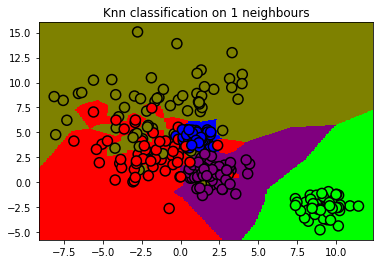

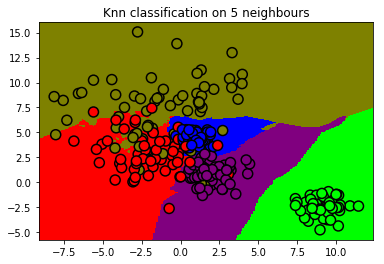

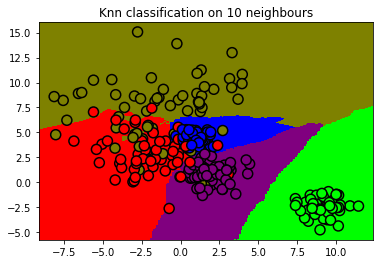

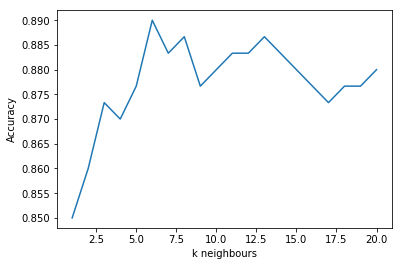

Best k neighbours:	 6
Best score:		 0.890


In [7]:
home_work = task_1(random_state=0)
home_work.proceed()

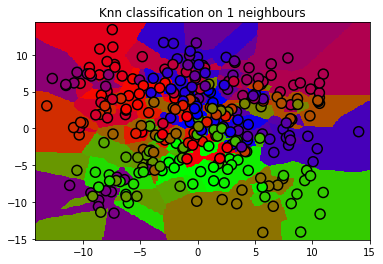

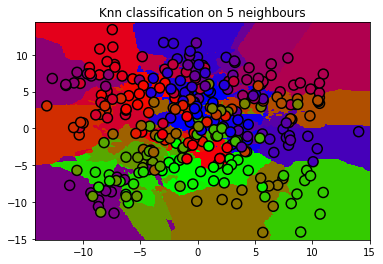

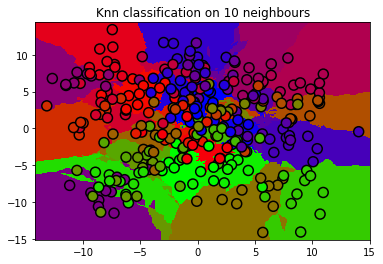

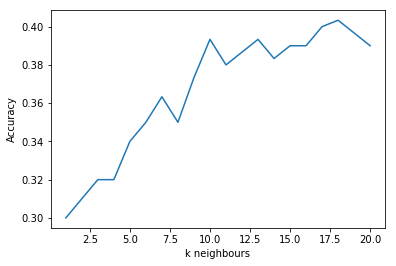

Best k neighbours:	 18
Best score:		 0.403


In [13]:
home_work = task_1(n_classes=30, random_state=0)
home_work.proceed()